In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("./Data/data.csv")
data_df.head()

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes

In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


# Data Imputation (Missing Data Replacement)
* Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise to identify and replace missing values in each column of your dateset prior to performing predictive modelling. This method of missing data replacement is referred to as data imputation.

In [3]:
for i in range(len(data_df.columns)):
    missing_data = data_df[data_df.columns[i]].isna().sum()
    percent = missing_data/len(data_df) * 100
    print(f"Columns {i}: has {percent}% missing data")

Columns 0: has 0.0% missing data
Columns 1: has 10.0% missing data
Columns 2: has 10.0% missing data
Columns 3: has 0.0% missing data


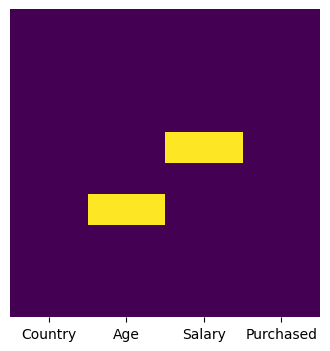

In [4]:
plt.figure(figsize = (4,4)) # is to create a figure object with a given size
sns.heatmap(data_df.isna(),cbar = False, cmap = "viridis", yticklabels=False);

In [5]:
# convert the dataframe into a numpy array by calling values on my dataframe (not necessary), but a habit I prefer
x = data_df.iloc[:,:-1].values
y = data_df.iloc[:,-1].values

In [6]:
from sklearn.impute import SimpleImputer

# Create an instance of class SimpleImputer: np.nan is the empty value in the dataset
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

#Replace missing value from numerical Col 1 'Age', Col 2 'Salary'
#fit on the dataset to calculate the statistic for each column
imputer.fit(x[:,1:3])

# The fit imputer is then applied to the dataset 
# to create a copy of the dataset with all the missing values 
# for each column replaced with the calculated mean statistic.
# transform will replace & return the new updated columns
x[:,1:3] = imputer.transform(x[:,1:3])
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Encode Categorical Data

## Encode Independent variable (X)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#transformers: specify what kind of transformation, and which cols
#Tuple ('encoder' encoding transformation, instance of Class OneHotEncoder, [col to transform])
#remainder ="passthrough" > to keep the cols which not be transformed. Otherwise, the remaining cols will not be included 
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")
#fit and transform with input = X
#np.array: need to convert output of fit_transform() from matrix to np.array
x = np.array(ct.fit_transform(x))


In [8]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


## Encode Dependent Variable

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# output of fit_transform of lable Encoder is already a Numpy Array
y = le.fit_transform(y)

In [10]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


# Splitting the dataset(x = data , y = output) into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [13]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [14]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [15]:
print(y_test)

[0 1]


# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:] = sc.fit_transform(x_train[:,3:])
# only use Tranform to use the SAME scaler as the Training Set
x_test[:,3:] = sc.transform(x_test[:,3:])


In [17]:
print(x_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [18]:
print(x_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


# Training Machine Learning Model

In [19]:
# Models from Scikit-learn: Search "Scikit learn model map"
from sklearn.linear_model import LogisticRegression 

In [20]:
logistic_cfl = LogisticRegression()
logistic_cfl.fit(x_train,y_train)

LogisticRegression()

In [21]:
logistic_cfl.score(x_train,y_train)

0.75

In [22]:
logistic_cfl.score(x_test,y_test)

0.5

In [23]:
y_preds = logistic_cfl.predict(x_test)
y_preds

array([1, 1])

In [24]:
y_test

array([0, 1])

In [25]:
logistic_cfl.predict([[0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867]])

array([0])